In [14]:
import os
import cv2

In [35]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="ZEWEc1ZPB3XNtTHuMvf2"
)

test_images_results = []
train_images_results = []

for filename in os.listdir(os.path.join("dataset-rotated", "Test")):
    image_path = os.path.join("dataset-rotated", "Test", filename)
    result = CLIENT.infer(image_path, model_id="kertas-suara/2")
    test_images_results.append((filename, result))

for filename in os.listdir(os.path.join("dataset-rotated", "Train")):
    image_path = os.path.join("dataset-rotated", "Train", filename)
    result = CLIENT.infer(image_path, model_id="kertas-suara/2")
    train_images_results.append((filename, result))

In [38]:
print(len(result['predictions']))

temp_train_images_results = []
for (filename, result) in train_images_results:
    if(len(result['predictions']) != 9):
        print(f"File {filename} predicted {len(result['predictions'])}")
    else: 
        temp_train_images_results.append((filename, result))

9
File TPS_002.jpg predicted 6
File TPS_003.jpg predicted 5
File TPS_006.jpg predicted 8
File TPS_007.jpg predicted 7
File TPS_008.jpg predicted 8
File TPS_009.jpg predicted 8
File TPS_010.jpg predicted 8
File TPS_012.jpg predicted 7
File TPS_013.jpg predicted 8
File TPS_015.jpg predicted 8
File TPS_016.jpg predicted 8
File TPS_017.jpg predicted 7
File TPS_018.jpg predicted 7
File TPS_021.jpg predicted 8
File TPS_022.jpg predicted 7
File TPS_024.jpg predicted 8
File TPS_025.jpg predicted 8
File TPS_028.jpg predicted 8
File TPS_029.jpg predicted 8
File TPS_030.jpg predicted 7
File TPS_031.jpg predicted 5
File TPS_032.jpg predicted 8
File TPS_033.jpg predicted 0
File TPS_035.jpg predicted 8
File TPS_036.jpg predicted 7
File TPS_038.jpg predicted 8
File TPS_039.jpg predicted 7
File TPS_040.jpg predicted 8
File TPS_041.jpg predicted 8
File TPS_042.jpg predicted 2
File TPS_043.jpg predicted 7
File TPS_047.jpg predicted 7
File TPS_048.jpg predicted 10
File TPS_049.jpg predicted 6
File TPS_05

In [39]:
print(len(temp_train_images_results))

189


In [17]:
img = cv2.imread("dataset-rotated/Default_Test/TPS_552.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [18]:
from functools import cmp_to_key
pred = result['predictions']

def compare(a, b):
    return 1 if (a['x'] + a['y']) > (b['x'] + b['y']) else -1

pred = sorted(pred, key=cmp_to_key(compare))

In [19]:
cropped_imgs = []
for res in pred:
    cropped_imgs.append(img[int(res['y'] - (res['height']/2)): int(res['y'] + (res['height']/2)), 
                            int(res['x'] - (res['width']/2)) : int(res['x'] + (res['width']/2))])

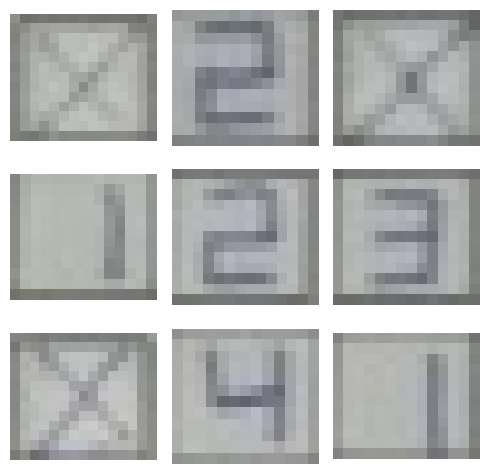

In [20]:
# Show cropped images
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5))
for i, cImg in enumerate(cropped_imgs):
    plt.subplot(3, 3, i+1)
    plt.axis("off")
    fig = plt.imshow(cropped_imgs[i])
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

In [34]:
import os 

for i, cImg in enumerate(cropped_imgs):
    if not os.path.exists(f"dataset-cropped/Paslon_0{int(i/3) + 1}"):
        os.makedirs(f"dataset-cropped/Paslon_0{int(i/3) + 1}")
    cv2.imwrite(f"dataset-cropped/Paslon_0{int(i/3) + 1}/{i%3}.jpg", cImg)